# Basel MRI Dataset

Akinci D’Antonoli, T., Todea, R. A., Leu, N., Datta, A. N., Stieltjes, B., Pruefer, F., & Wasserthal, J. (2023). Development and evaluation of deep learning models for automated estimation of myelin maturation using pediatric brain MRI scans. Radiology: Artificial Intelligence, 5(5), e220292.

https://pubs.rsna.org/doi/10.1148/ryai.220292

https://zenodo.org/records/8055666

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import seaborn as sns
import os
import utils as ut
from pathlib import Path
import subprocess
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch


from nibabel.processing import resample_to_output

In [4]:
# Load the dataset
# file_path = r'..\..\Datasets\Basel_mri\meta.csv'
file_path = os.path.join("..", "..", "Datasets", "Basel_mri", "meta.csv")
df = pd.read_csv(file_path, sep=';')
df.head()

,image_id,myelinisation,age,age_corrected,doctor_predicted_age,diagnosis,group
0,s0001,normal,22,22,22,normal,train
1,s0002,normal,29,29,29,normal,train
2,s0003,normal,4,4,4,normal,train
3,s0004,normal,0,0,0,normal,train
4,s0005,normal,0,0,0,normal,train


In [5]:
df.describe(include='all')

,image_id,myelinisation,age,age_corrected,doctor_predicted_age,diagnosis,group
count,833,833,833.000000,833.000000,833.000000,833,833
unique,833,2,NaN,NaN,NaN,73,2
top,s0833,normal,NaN,NaN,NaN,normal,train
freq,1,829,NaN,NaN,NaN,565,710
mean,NaN,NaN,13.722689,13.668667,13.669868,NaN,NaN
std,NaN,NaN,11.754957,11.795154,11.795748,NaN,NaN
min,NaN,NaN,0.000000,-1.000000,-1.000000,NaN,NaN
25%,NaN,NaN,3.000000,3.000000,2.000000,NaN,NaN
50%,NaN,NaN,12.000000,12.000000,12.000000,NaN,NaN
75%,NaN,NaN,24.000000,24.000000,24.000000,NaN,NaN


C:\Users\natha\AppData\Local\Temp\ipykernel_35284\4126483834.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis_group', y='age', data=df, palette='Set2')


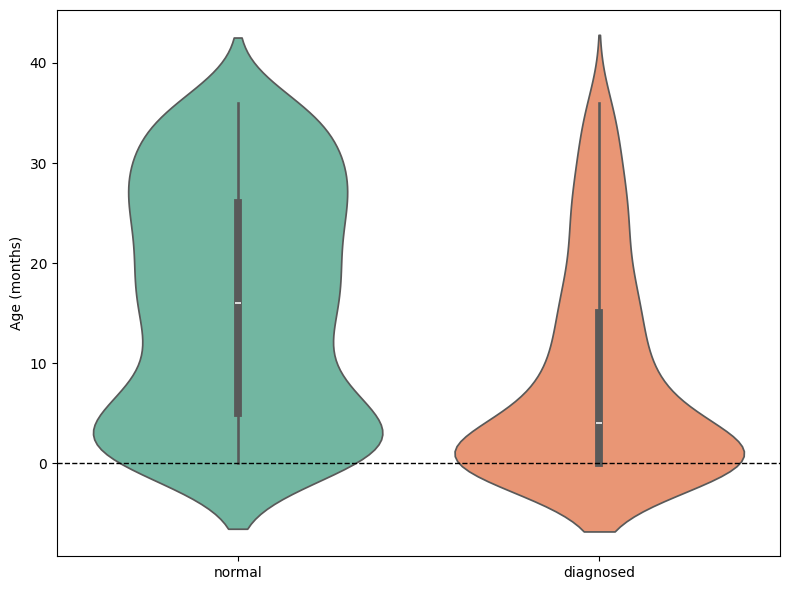

In [6]:
# Create a new column for group labels
df['diagnosis_group'] = df['diagnosis'].apply(lambda x: 'normal' if x.lower() == 'normal' else 'diagnosed')

# Make the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='diagnosis_group', y='age', data=df, palette='Set2')
plt.axhline(y=0, color='k', linestyle='--', lw=1)

plt.xlabel('')
plt.ylabel('Age (months)')
plt.tight_layout()
plt.show()


In [7]:
df['diagnosis'].unique()

array(['normal', 'premature', 'postoperative', 'Leigh Syndrome',
       'brain oedem', 'heterotopia', 'polymicroglia', 'HIE',
       'Hydrocephalus', 'HIE ', 'Premature, PVL', 'encephalocele',
       'Meningitis', 'Premature, PVL, hydrocephalus', 'subdural hygrom',
       'premature, HIE', 'Infarct', 'cerebellar calcification',
       'searing injuries', 'Corpus callosum agenesis',
       'Mithocondriopathy', 'macrocephaly', 'Gliotic foci',
       'premature, hydrocephalus',
       'Delayed myelinisation, cerebral atrophy', 'PVL',
       'Congenital CMV infection', 'cerebral atrophy', 'Arachnoidal cyst',
       'Intracerebral hemorrhage', 'cerebral/cerebellar atrophy',
       'subdurale hemorrhagy', 'Plagiocephaly', 'craniosynostosis',
       'encephalomalasy', 'Macrocephaly', 'Brachycephaly',
       'Septooptic dysplasy', 'Motion artefact',
       'subararachnoidal hemorrhage', 'Premature, Infarct', 'Meningocele',
       'premature, infarct', 'Arnold Chiari Malformation',
       'prem

In [8]:
df_grouped = (
    df.groupby('diagnosis')
      .agg(counts=('diagnosis', 'size'),
           mean_age=('age', 'mean'),
           std_age=('age', 'std'),
           median_age=('age', 'median'),
           min_age=('age', 'min'),
           max_age=('age', 'max'))
      .reset_index()
      .sort_values(by='counts', ascending=False)
)

df_grouped.head(10)


,diagnosis,counts,mean_age,std_age,median_age,min_age,max_age
59,normal,565,16.090265,11.625540,16.0,0,36
13,HIE,45,0.422222,1.514909,0.0,0,8
16,Hydrocephalus,30,13.500000,9.779465,11.5,0,35
17,Infarct,21,2.238095,5.195236,0.0,0,17
21,Meningitis,17,8.294118,6.351818,6.0,0,21
62,premature,9,7.111111,9.184830,2.0,0,26
72,subdurale hemorrhagy,8,4.500000,5.424811,3.0,0,15
43,cerebral atrophy,8,12.625000,6.139742,11.5,5,22
12,Gliotic foci,7,22.142857,11.610750,25.0,0,33
18,Intracerebral hemorrhage,7,8.142857,13.545338,0.0,0,35


In [38]:
df_sel = df[df['diagnosis'] == 'Infarct']
sample_image = df_sel['image_id'].iloc[0]
sample_image

's0088'

In [40]:
df_sel

,image_id,myelinisation,age,age_corrected,doctor_predicted_age,diagnosis,group,diagnosis_group
87,s0088,normal,17,17,17,Infarct,train,diagnosed
167,s0168,normal,0,0,0,Infarct,train,diagnosed
239,s0240,normal,0,0,0,Infarct,train,diagnosed
280,s0281,normal,0,0,0,Infarct,train,diagnosed
325,s0326,normal,0,0,0,Infarct,train,diagnosed
515,s0516,normal,0,0,0,Infarct,train,diagnosed
521,s0522,normal,0,0,0,Infarct,train,diagnosed
535,s0536,normal,0,0,0,Infarct,train,diagnosed
543,s0544,normal,0,0,0,Infarct,train,diagnosed
617,s0618,normal,0,0,0,Infarct,train,diagnosed


In [39]:
df_sel.iloc[0]


image_id                    s0088
myelinisation              normal
age                            17
age_corrected                  17
doctor_predicted_age           17
diagnosis                 Infarct
group                       train
diagnosis_group         diagnosed
Name: 87, dtype: object

In [10]:
def plot_mri_images(t1_img, t2_img):
    
    # Helper to get middle slices
    def get_middle_slices(img):
        x_middle = img[img.shape[0] // 2, :, :]
        y_middle = img[:, img.shape[1] // 2, :]
        z_middle = img[:, :, img.shape[2] // 2]
        return x_middle, y_middle, z_middle
    
    t1_slices = get_middle_slices(t1_img)
    t2_slices = get_middle_slices(t2_img)
    
    # Plotting
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    titles = ['Sagittal (X)', 'Coronal (Y)', ' Axial (Z)']
    
    # T1-weighted images
    for idx, slice_img in enumerate(t1_slices):
        axes[0, idx].imshow(np.rot90(slice_img), cmap='gray')
        axes[0, idx].set_title(f'T1 {titles[idx]}')
        axes[0, idx].axis('off')
    
    # T2-weighted images
    for idx, slice_img in enumerate(t2_slices):
        axes[1, idx].imshow(np.rot90(slice_img), cmap='gray')
        axes[1, idx].set_title(f'T2 {titles[idx]}')
        axes[1, idx].axis('off')
    
    plt.tight_layout()
    plt.show()

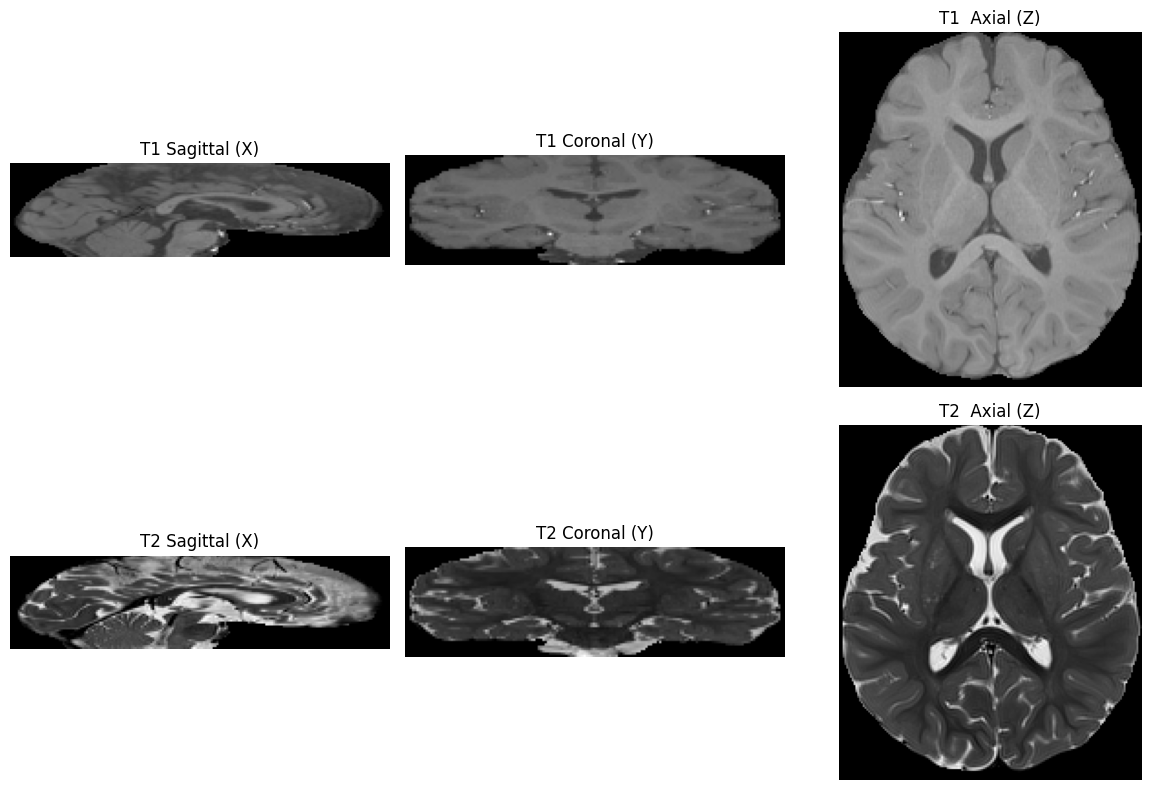

In [11]:
t1_scan = r'..\..\Datasets\Basel_mri\{}\t1.nii.gz'.format(sample_image)
t2_scan = r'..\..\Datasets\Basel_mri\{}\t2.nii.gz'.format(sample_image)
# t1_scan = os.path.join("..", "..", "Datasets", "Basel_mri", sample_image, "t1.nii.gz")
# t2_scan = os.path.join("..", "..", "Datasets", "Basel_mri", sample_image, "t2.nii.gz")

t1_img = nib.load(t1_scan).get_fdata()
t2_img = nib.load(t2_scan).get_fdata()
plot_mri_images(t1_img, t2_img)

In [12]:
t1_img = nib.load(t1_scan)
print(t1_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'')
dim_info        : 0
dim             : [  3 166 195  48   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.          0.78125     0.78124994  2.2         1.          1.
  1.          1.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.015712505
quatern_c       : 0.9937047
quatern_d

## Further analysis

each voxel is: 0.491 mm × 0.491 mm × 3.3 mm.  
Which means the Z-dimension is stretched compared to X and Y. (Impacting the coronal and sagittal views).  
[working with affine](https://nipy.org/nibabel/nifti_images.html#the-nifti-affines)

In [13]:
array_data = t1_img.get_fdata()
affine = t1_img.affine  # 4x4 transformation matrix
print(affine)

[[-7.80786097e-01  2.31731907e-02 -3.85695770e-02  6.19547920e+01]
 [ 2.56192759e-02  7.61717081e-01 -4.83518332e-01 -1.03849602e+02]
 [-8.26111250e-03  1.72051176e-01  2.14586186e+00 -4.85767784e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Get the real world size in mm

In [14]:
voxel_sizes = np.abs(np.diag(t1_img.affine))[:3]  # spacing along each axis
physical_size_mm = voxel_sizes * array_data.shape

print("Voxel size (mm):", voxel_sizes) # == pixdim in the header
print("Physical size (mm):", physical_size_mm)


Voxel size (mm): [0.7807861  0.76171708 2.14586186]
Physical size (mm): [129.61049211 148.53483081 103.00136948]


Correcting visualization : 

In [15]:
resampled_t1 = resample_to_output(t1_img, voxel_sizes=(1, 1, 1))  # or any isotropic spacing
print("Resampled shape:", resampled_t1.get_fdata().shape)


Resampled shape: (137, 176, 137)


T2

In [16]:
t2_img = nib.load(t2_scan)
array_data = t2_img.get_fdata()
affine = t2_img.affine

resampled_t2 = resample_to_output(t2_img, voxel_sizes=(1, 1, 1))  # or any isotropic spacing
print("Resampled shape:", resampled_t2.get_fdata().shape)

Resampled shape: (137, 176, 137)


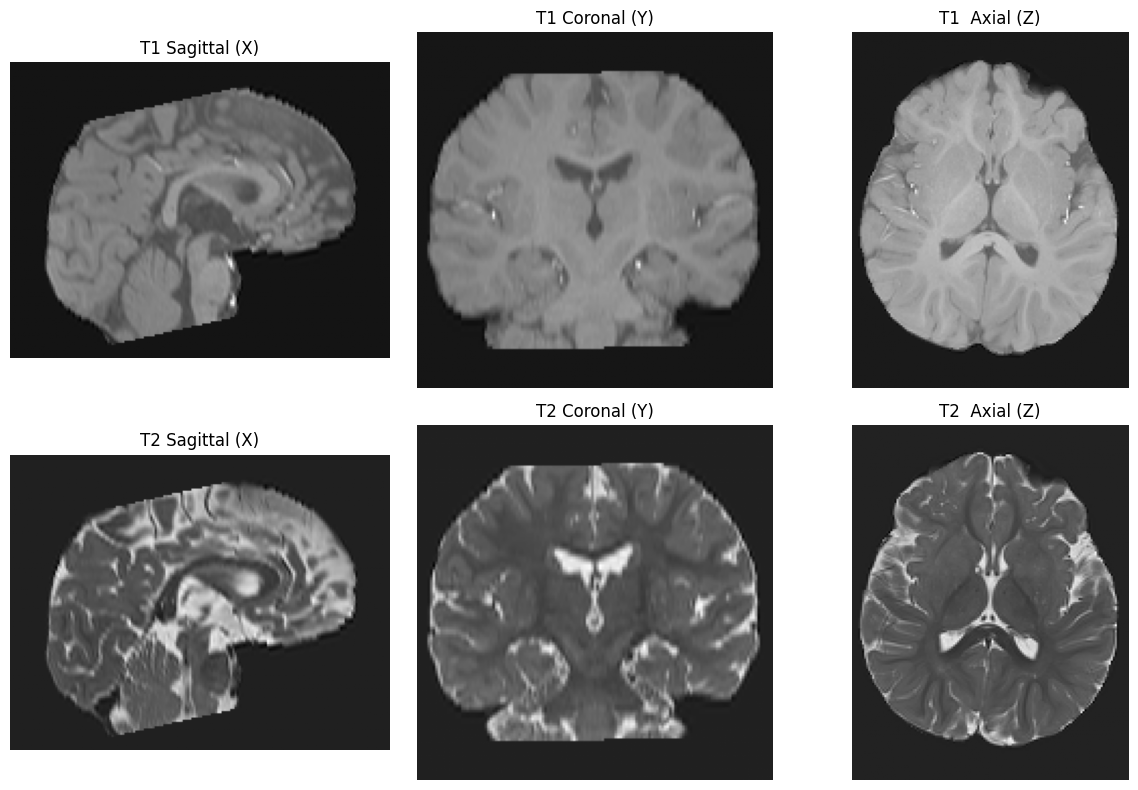

In [17]:
plot_mri_images(resampled_t1.get_fdata(), resampled_t2.get_fdata())

Resampling with lower voxel size -> higher resolution

In [18]:
t1_img = nib.load(t1_scan)
t2_img = nib.load(t2_scan)
resampled_t1_2 = resample_to_output(t1_img, voxel_sizes=(0.5, 0.5, 0.5))  # or any isotropic spacing
resampled_t2_2 = resample_to_output(t2_img, voxel_sizes=(0.5, 0.5, 0.5))  # or any isotropic spacing
print("Resampled shapes:", resampled_t1_2.get_fdata().shape)

Resampled shapes: (272, 351, 273)


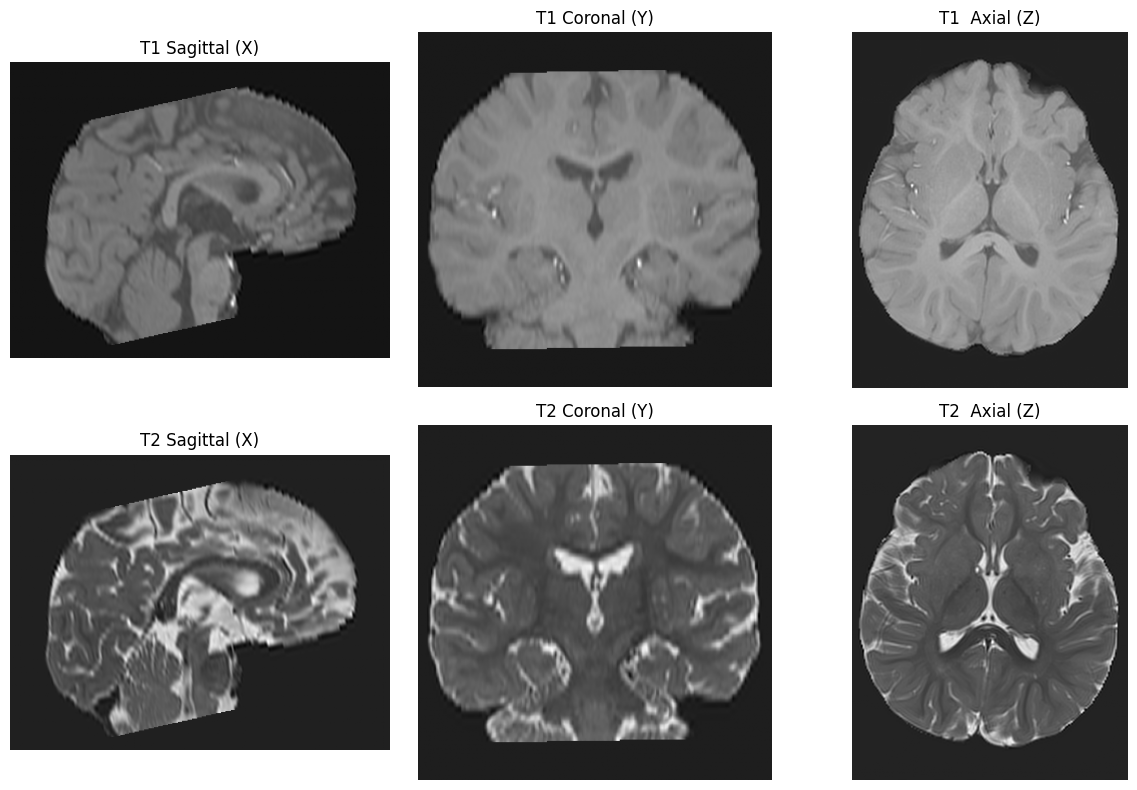

In [19]:
plot_mri_images(resampled_t1_2.get_fdata(), resampled_t2_2.get_fdata())

Saving the resampled images for segmentation tests:

In [20]:
# Define local sample directory
local_sample_folder = Path.cwd() / "MRI_Basel_sample"
local_sample_folder.mkdir(parents=True, exist_ok=True)

nib.save(resampled_t1_2, local_sample_folder / "resampled_t1.nii.gz")
nib.save(resampled_t2_2, local_sample_folder / "resampled_t2.nii.gz")

## SynthSeg - Test

In [2]:
# Check and start Docker if necessary
if not ut.is_docker_running():
    print("Docker is not running. Starting it now...")
    ut.start_docker()
else:
    print("Docker is running.")

Docker is running.


In [22]:
host_dir = ut.win2posix(str(local_sample_folder))

# build the docker command
docker_cmd = [
    "docker", "run", "--rm",
    "-v", f"{host_dir}:/data",       # mount your sample folder at /data
    "cookpa/synthseg:conda-0.1",     # the Docker image
    "--i",  "/data/resampled_t1.nii.gz",
    "--o",  "/data/segmented.nii.gz",
    "--vol","/data/vol.csv",
    "--qc", "/data/qc.csv",
    "--parc",
    "--robust",
    "--cpu",
    "--threads", "8",
]

# Run and capture
result = subprocess.run(
    docker_cmd,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True
)

print("RETURN CODE:", result.returncode)
print("STDOUT:\n", result.stdout)
print("STDERR:\n", result.stderr)

if result.returncode != 0:
    raise RuntimeError(f"synthseg (docker) failed (exit {result.returncode})")


RETURN CODE: 0
STDOUT:
 
SynthSeg-robust 2.0

using CPU, hiding all CUDA_VISIBLE_DEVICES
using 8 threads
predicting 1/1

segmentation  saved in:    /data/segmented.nii.gz
volumes saved in:          /data/vol.csv
QC scores saved in:        /data/qc.csv

If you use the new robust version of SynthSeg in a publication, please cite:
Robust Segmentation of Brain MRI in the Wild with Hierarchical CNNs and no Retraining
B. Billot, M. Collin, S.E. Arnold, S. Das, J.E. Iglesias

STDERR:
 2025-05-13 13:01:21.359252: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-05-13 13:01:21.359368: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2025-05-13 13:01:21.359390: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (2eb40c8218e2): /proc/driver

### Load segmentation

In [25]:
img = nib.load(r'MRI_Basel_sample\segmented.nii.gz')
array = img.get_fdata()
array.shape

(136, 176, 137)

In [29]:
# Freesurfer label mapping
index_to_label = {}
with open('FreeSurferColorLUT.txt', 'r') as file:
    for line in file:
        # comments or empty
        if line.startswith('#') or not line.strip():
            continue

        parts = line.split()
        index = int(parts[0])
        label_name = ' '.join(parts[1:-4])
        index_to_label[index] = label_name


# Load the BOB dataset label file
BOB_idx_lbl = pd.read_csv('../../Datasets/BOB/dseg.tsv', sep='\t')

# Create a mapping from index to colour
bob_color_dict = dict(zip(BOB_idx_lbl['index'], BOB_idx_lbl['color']))

# Align with FreeSurfer indices
fs_indices = sorted(index_to_label.keys())

default_color = '#000000'
aligned_colors = [bob_color_dict.get(idx, default_color) for idx in fs_indices]


cmap = ListedColormap(aligned_colors)

bounds = np.append(fs_indices, fs_indices[-1] + 1)
norm = BoundaryNorm(boundaries=bounds, ncolors=len(aligned_colors))


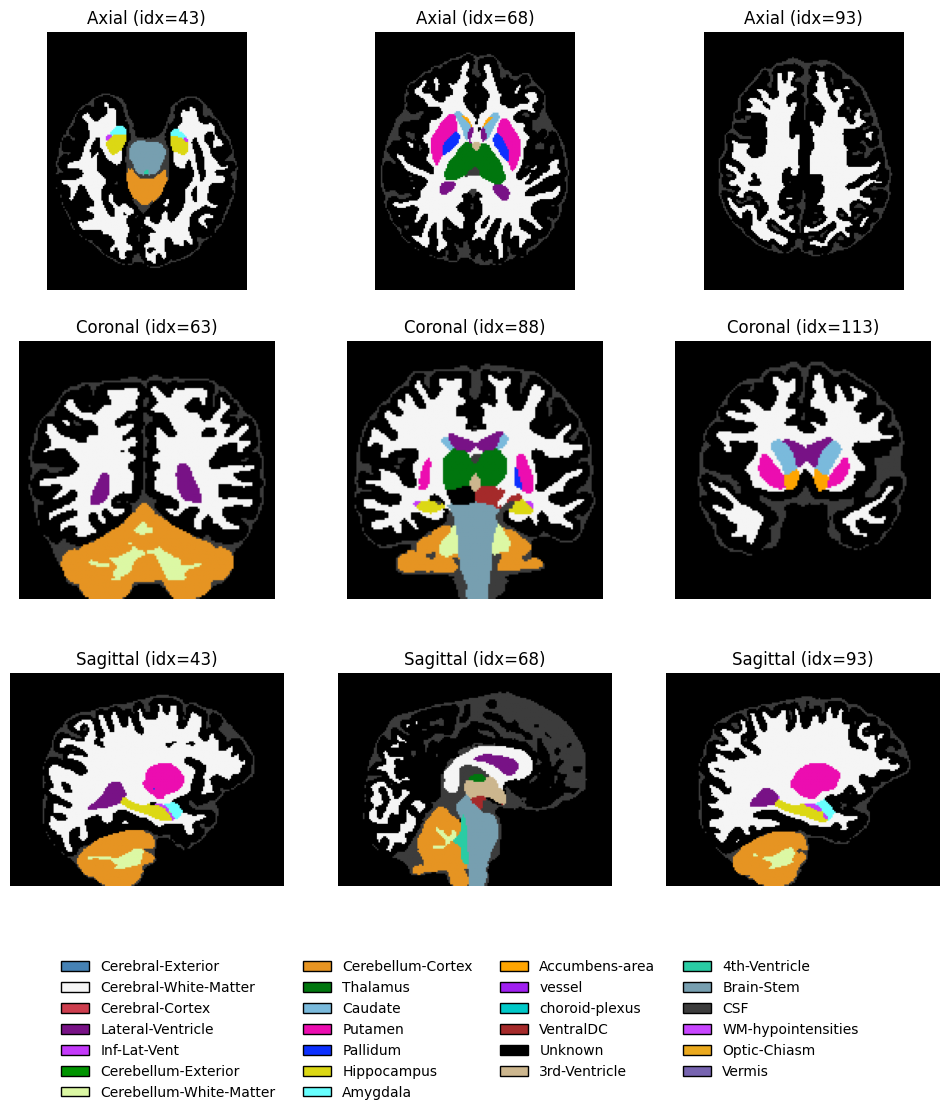

In [30]:
data = img.get_fdata()
x_mid, y_mid, z_mid = np.array(data.shape) // 2

# define offsets (in voxels) around the center
offsets = [-25, 0, +25]

# set up the figure: 3 rows (axial, coronal, sagittal)
fig, axes = plt.subplots(3, len(offsets), figsize=(12, 12))

for row, (orient, center) in enumerate([
    ("axial",   z_mid),
    ("coronal", y_mid),
    ("sagittal",x_mid),
]):
    for col, off in enumerate(offsets):
        idx = center + off
        if orient == "axial":
            sl = data[:, :, idx]
        elif orient == "coronal":
            sl = data[:, idx, :]
        else:  # sagittal
            sl = data[idx, :, :]

        ax = axes[row, col]
        ax.imshow(np.rot90(sl), cmap=cmap, norm=norm)
        ax.set_title(f"{orient.capitalize()} (idx={idx})")
        ax.axis("off")

BOB_idx_lbl['region'] = BOB_idx_lbl['name'].str.replace('^Left-', '', regex=True) \
                        .str.replace('^Right-', '', regex=True)

# pick only one entry per lateralized region
sides       = BOB_idx_lbl[BOB_idx_lbl['name'].str.startswith(('Left-','Right-'))]
unique_sides = sides.drop_duplicates('region')

# keep all non-lateral entries intact
non_sides    = BOB_idx_lbl[~BOB_idx_lbl['name'].str.startswith(('Left-','Right-'))]

legend_df   = pd.concat([unique_sides, non_sides], ignore_index=True)

# build legend handles
handles = [
    Patch(facecolor=row['color'], edgecolor='black', label=row['region'])
    for _, row in legend_df.iterrows()
]

# draw the legend
ncol = 4  
fig.legend(
    handles=handles,
    loc='lower center',
    ncol=ncol,
    bbox_to_anchor=(0.5, -0.02),
    frameon=False
)
plt.subplots_adjust(bottom=0.15)
plt.show()

## FD test

In [32]:
# For example, left hemi wm is 2, and right is 41 :
wm_left = (array == 2)
wm_right = (array == 41)
# we recreate a nifti volume with only the wm 
leftwm_nii = nib.Nifti1Image(wm_left.astype(np.uint8), img.affine, img.header)
rightwm_nii = nib.Nifti1Image(wm_right.astype(np.uint8), img.affine, img.header)
nib.save(leftwm_nii, f"MRI_Basel_sample/2_{index_to_label[2]}.nii.gz")
nib.save(rightwm_nii, f"MRI_Basel_sample/41_{index_to_label[41]}.nii.gz")

# FD on the left wm  : 
left_wm_fd = ut.fractal_analysis(f"MRI_Basel_sample/2_{index_to_label[2]}.nii.gz", verbose=False)
# FD on the right wm  : 
right_wm_fd = ut.fractal_analysis(f"MRI_Basel_sample/41_{index_to_label[41]}.nii.gz", verbose=False)

FD automatically selected: 2.4806
FD automatically selected: 2.4786


In [34]:
df_fd_BOB = pd.read_csv('BOB_fd_results.csv')
df_fd_fs_seg = pd.read_csv('BOB_fd_results_freesurfer-seg.csv')

colors_seg = ['#FFC107', '#1E88E5']

common_names = pd.Series(list(set(df_fd_BOB['name'].unique()) & set(df_fd_fs_seg['name'].unique())))
df_fd_BOB_common = df_fd_BOB[df_fd_BOB['name'].isin(common_names)]
df_fd_fs_seg_common = df_fd_fs_seg[df_fd_fs_seg['name'].isin(common_names)]

df_fd_BOB_common = df_fd_BOB_common.rename(columns={'fd': 'fd_BOB'})
df_fd_fs_seg_common = df_fd_fs_seg_common.rename(columns={'fd': 'fd_fs_seg'})

df_merged = pd.merge(
    df_fd_BOB_common[['participant_id', 'session_id', 'name', 'fd_BOB','age','sex']],
    df_fd_fs_seg_common[['participant_id', 'session_id', 'name', 'fd_fs_seg']],
    on=['participant_id', 'session_id', 'name'],
    how='inner'
)


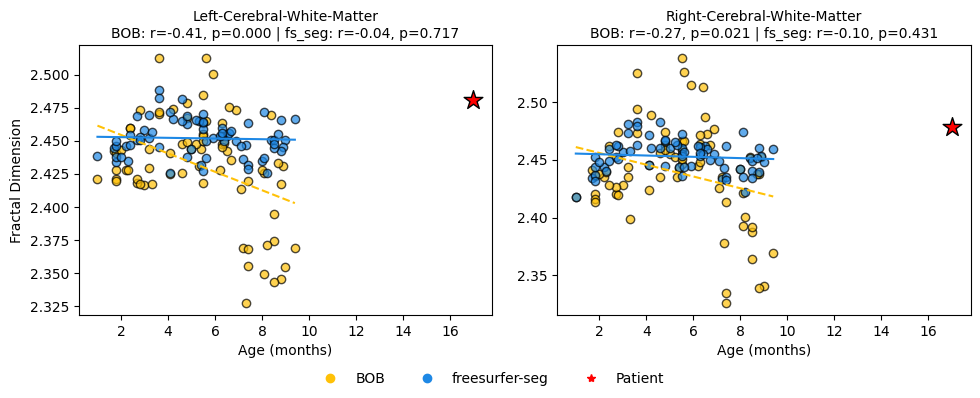

In [46]:
from scipy.stats import pearsonr

base_list = ['Left-Cerebral-White-Matter', 'Right-Cerebral-White-Matter']

patient_fd_dict = {
    'Left-Cerebral-White-Matter': left_wm_fd[0],
    'Right-Cerebral-White-Matter': right_wm_fd[0]
}

n = len(base_list)
ncols = 2
nrows = 1

fig, axes = plt.subplots(nrows, ncols,
                         figsize=(ncols * 5, nrows * 4),
                         sharex=True)
axes = axes.flatten()

for idx, base in enumerate(base_list):
    ax = axes[idx]
    
    sub = df_merged[df_merged['name'] == base]
    ages = sub['age'].values
    
    fds_BOB = sub['fd_BOB'].values
    fds_fs_seg = sub['fd_fs_seg'].values
    
    # Scatter plot for controls
    ax.scatter(ages, fds_BOB, label='BOB', color=colors_seg[0], edgecolor='k', alpha=0.7)
    ax.scatter(ages, fds_fs_seg, label='fs_seg', color=colors_seg[1], edgecolor='k', alpha=0.7)
    
    # Regression lines
    if len(ages) > 1:
        x_line = np.linspace(ages.min(), ages.max(), 100)

        slope_bob, intercept_bob = np.polyfit(ages, fds_BOB, 1)
        ax.plot(x_line, slope_bob * x_line + intercept_bob, color=colors_seg[0], linestyle='--')

        slope_fs, intercept_fs = np.polyfit(ages, fds_fs_seg, 1)
        ax.plot(x_line, slope_fs * x_line + intercept_fs, color=colors_seg[1], linestyle='-')

    # Correlations
    r_bob, p_bob = pearsonr(ages, fds_BOB)
    r_fs, p_fs = pearsonr(ages, fds_fs_seg)

    ax.set_title(f"{base}\nBOB: r={r_bob:.2f}, p={p_bob:.3f} | fs_seg: r={r_fs:.2f}, p={p_fs:.3f}", fontsize=10)
    
    # Overlay patient's FD value
    patient_fd = patient_fd_dict.get(base)
    if patient_fd is not None:
        # Use patient's mean age for alignment or place arbitrarily at mid-point
        patient_age = 17
        ax.scatter(patient_age, patient_fd, color='red', edgecolor='k', marker='*', s=200, label='Patient')

    if idx == 0:
        ax.set_ylabel("Fractal Dimension")
    ax.set_xlabel("Age (months)")

# Legend
handles = [
    plt.Line2D([], [], marker='o', linestyle='None', color=colors_seg[0], label='BOB'),
    plt.Line2D([], [], marker='o', linestyle='None', color=colors_seg[1], label='freesurfer-seg'),
    plt.Line2D([], [], marker='*', linestyle='None', color='red', label='Patient')
]
fig.legend(handles=handles, loc='lower center', ncol=3, frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()


In [47]:
df_long = df_merged.melt(
    id_vars=['name', 'age'],
    value_vars=['fd_BOB', 'fd_fs_seg'],
    var_name='method',
    value_name='fd'
)
df_long['method'] = df_long['method'].replace({'fd_BOB': 'BOB', 'fd_fs_seg': 'FreeSurfer'})


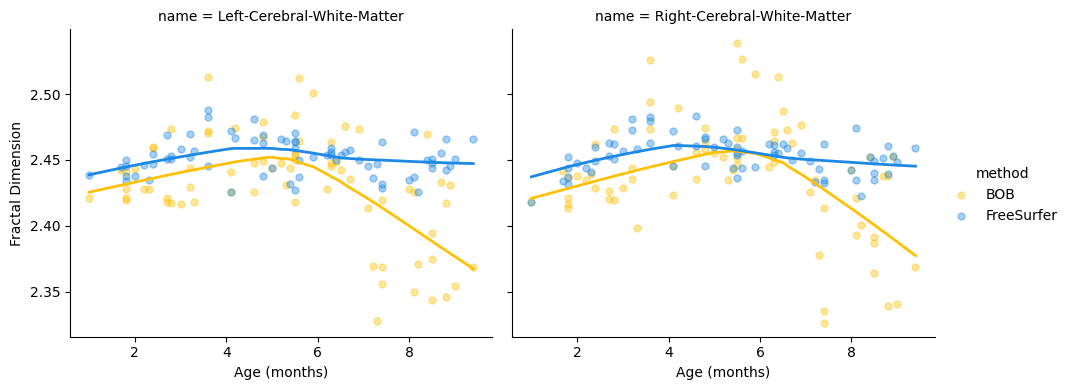

In [ ]:
wm_regions = ['Left-Cerebral-White-Matter', 'Right-Cerebral-White-Matter']
df_wm = df_long[df_long['name'].isin(wm_regions)]

g = sns.lmplot(
    data=df_wm,
    x='age',
    y='fd',
    hue='method',
    col='name',
    lowess=True,         # or use order=2 for polynomial
    ci='sd',               # 95% confidence interval
    scatter_kws={'alpha': 0.4, 's': 25},
    line_kws={'lw': 2},
    palette={'BOB': colors_seg[0], 'FreeSurfer': colors_seg[1]},
    height=4,
    aspect=1.2
)

g.set_axis_labels("Age (months)", "Fractal Dimension")